In [1]:
import sys
import requests
import lxml.html
import re
import csv
import itertools
import pandas

/Users/higuchidaisuke/.pyenv/versions/3.6.5/lib/python3.6/site-packages/pandas/compat/__init__.py:117: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
def fetch(url :str):
    r=requests.get(url)
    r.encoding=r.apparent_encoding
    return r.text

In [3]:
html1=fetch('https://db.netkeiba.com/race/201908030311/')
html2=fetch('https://db.netkeiba.com/race/201808030411/')
html3=fetch('https://db.netkeiba.com/race/201708030411/')
html4=fetch('https://db.netkeiba.com/race/201608030411/')
html5=fetch('https://db.netkeiba.com/race/201508030411/')
html6=fetch('https://db.netkeiba.com/race/201608030411/')
html7=fetch('https://db.netkeiba.com/race/201308030411/')
html8=fetch('https://db.netkeiba.com/race/201208030411/')
html9=fetch('https://db.netkeiba.com/race/201108030411/')
html10=fetch('https://db.netkeiba.com/race/201008030410/')
html11=fetch('https://db.netkeiba.com/race/200908030410/')

In [4]:
def scrape(html:str):
    html=lxml.html.fromstring(html)
    root=html.xpath('//*[@id="contents_liquid"]/table')
    result=[]
    for h in root:
        column=((",".join(h.text_content().split("\n"))).strip(",").strip("")).replace("''","").split(",")
        result.append(column) 
    result=list(itertools.chain.from_iterable(result))
    return result

In [5]:
result1=scrape(html1)
result2=scrape(html2)
result3=scrape(html3)
result4=scrape(html4)
result5=scrape(html5)
result6=scrape(html6)
result7=scrape(html7)
result8=scrape(html8)
result9=scrape(html9)
result10=scrape(html10)
result11=scrape(html11)

In [6]:
def result(result):
    for _ in range(20):
        for item in result:
            if   re.search(r'\[',item):
                result.remove(item)
            elif re.search(r'ﾀｲﾑ指数',item):
                result.remove(item)
            elif re.search(r'調教ﾀｲﾑ',item):
                result.remove(item)
            elif re.search(r'厩舎ｺﾒﾝﾄ',item):
                result.remove(item)
            elif re.search(r'備考',item):
                result.remove(item)
            elif re.search(r'賞金',item):
                result.remove(item)
            elif re.search(r'\d*\,\d*\.',item):
                result.remove(item)
            elif item=='':
                result.remove(item)
            elif item=='**':
                result.remove(item)
                
    result.insert(24,'0')
    del result[32]
    del result[32]
    del result[48]
    del result[48]
    del result[64]
    del result[64]
    del result[80]
    del result[80]
    del result[96]
    del result[96]
    return result

In [7]:
result1=result(result1)
result2=result(result2)
result3=result(result3)
result4=result(result4)
result5=result(result5)
result6=result(result6)
result7=result(result7)
result8=result(result8)
result9=result(result9)
result10=result(result10)
result11=result(result11)

In [8]:
def make_list(result):
    del result[:16]
    i=1
    list=[]
    while i <18:
        list.append(result[:16])
        del result[:16]
        i +=1
    return list

In [9]:
list1=make_list(result1)
list2=make_list(result2)
list3=make_list(result3)
list4=make_list(result4)
list5=make_list(result5)
list6=make_list(result6)
list7=make_list(result7)
list8=make_list(result8)
list9=make_list(result9)
list10=make_list(result10)
list11=make_list(result11)


In [10]:
def make_df(list):
    df=pandas.DataFrame(list,columns=['着順', '枠番', '馬番', '馬名', '性齢', '斤量', '騎手', 'タイム', '着差', '通過', '上がり', '単勝オッズ', '人気', '馬体重(増減)','調教師','馬主'])
    return df

In [11]:
df_2019=make_df(list1)
df_2018=make_df(list2)
df_2017=make_df(list3)
df_2016=make_df(list4)
df_2015=make_df(list5)
df_2014=make_df(list6)
df_2013=make_df(list7)
df_2012=make_df(list8)
df_2011=make_df(list9)
df_2010=make_df(list10)
df_2009=make_df(list11)

In [12]:
df=pandas.concat([df_2019,df_2018])
df=pandas.concat([df,df_2017])
df=pandas.concat([df,df_2016])
df=pandas.concat([df,df_2015])
df=pandas.concat([df,df_2014])
df=pandas.concat([df,df_2013])
df=pandas.concat([df,df_2012])
df=pandas.concat([df,df_2011])
df=pandas.concat([df,df_2010])
df=pandas.concat([df,df_2009])

In [13]:
df=df.dropna(how='any')
weight=df['馬体重(増減)'].tolist()
weight=[item[:3] for item in weight]
df['馬体重(増減)']=weight

In [14]:
df_new=df.copy()
df_new.reset_index(drop=True,inplace=True)
df_new=df_new.drop(['枠番','馬番','斤量','タイム','着差','通過','上がり','調教師','馬主'],axis=1)
df_new=df_new.rename(columns={'着順':'result','馬名':'name','性齢':'sex&age','騎手':' Jockey','単勝オッズ':'odds','人気':'popularity','馬体重(増減)':'weight'})
df_new_1=df_new[:50]


In [15]:
df_new_1

,result,name,sex&age,Jockey,odds,popularity,weight
0,1,フィエールマン,牡4,ルメール,2.8,1,480
1,2,グローリーヴェイズ,牡4,戸崎圭太,11.3,6,456
2,3,パフォーマプロミス,牡7,北村友一,30.6,8,452
3,4,エタリオウ,牡4,Ｍ．デム,3.3,2,472
4,5,ユーキャンスマイル,牡4,岩田康誠,6.4,3,492
5,6,チェスナットコート,牡5,坂井瑠星,54.2,10,464
6,7,カフジプリンス,牡6,中谷雄太,44.5,9,530
7,8,リッジマン,牡6,蛯名正義,60.0,11,454
8,9,ケントオー,牡7,幸英明,158.7,13,472
9,10,クリンチャー,牡5,三浦皇成,9.2,4,496


In [16]:
#騎手が前回と同じなら1,違うなら0を入力
list_kisyu=[1,0,0,1,1,1,1,1,1,1,0,1,1,0,0,0,1,1,1,0,0,0,0,1,1,1,1,1,1,1,1,1,1,0,1,0,1,1,0,0,1,1,1,0,1,1,1,0,1,1]
#直近レース順位
latest_rece=[2,1,4,2,1,9,2,6,7,7,1,3,1,13,3,7,2,5,9,2,7,11,8,2,7,3,5,5,10,1,2,1,3,1,6,5,3,1,7,7,4,4,5,7,11,2,2,6,1,2]

In [17]:
df_new_1['last-Jockey']=list_kisyu
df_new_1['last_result']=latest_rece
df_new_1

/Users/higuchidaisuke/.pyenv/versions/3.6.5/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/higuchidaisuke/.pyenv/versions/3.6.5/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,result,name,sex&age,Jockey,odds,popularity,weight,last-Jockey,last_result
0,1,フィエールマン,牡4,ルメール,2.8,1,480,1,2
1,2,グローリーヴェイズ,牡4,戸崎圭太,11.3,6,456,0,1
2,3,パフォーマプロミス,牡7,北村友一,30.6,8,452,0,4
3,4,エタリオウ,牡4,Ｍ．デム,3.3,2,472,1,2
4,5,ユーキャンスマイル,牡4,岩田康誠,6.4,3,492,1,1
5,6,チェスナットコート,牡5,坂井瑠星,54.2,10,464,1,9
6,7,カフジプリンス,牡6,中谷雄太,44.5,9,530,1,2
7,8,リッジマン,牡6,蛯名正義,60.0,11,454,1,6
8,9,ケントオー,牡7,幸英明,158.7,13,472,1,7
9,10,クリンチャー,牡5,三浦皇成,9.2,4,496,1,7


In [18]:
y_train=df_new_1['result'].tolist()

In [19]:
df_new_1['odds']=df_new_1['odds'].astype("float")
df_new_1['popularity']=df_new_1['popularity'].astype("float")
df_new_1['weight']=df_new_1['weight'].astype("int64")
df_new_1['result']=df_new_1['result'].astype("int64")

/Users/higuchidaisuke/.pyenv/versions/3.6.5/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/higuchidaisuke/.pyenv/versions/3.6.5/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/higuchidaisuke/.pyenv/versions/3.6.5/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

In [20]:
df_new_1.corr=df_new_1.corr()

In [21]:
df_new_1.dtypes

result           int64
name            object
sex&age         object
 Jockey         object
odds           float64
popularity     float64
weight           int64
last-Jockey      int64
last_result      int64
dtype: object

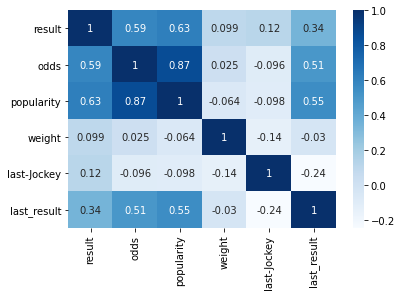

In [22]:
import seaborn
seaborn.heatmap(data=df_new_1.corr,annot=True,cmap='Blues')

In [2]:
def scrape(html: str):
    html = lxml.html.fromstring(html)
    result=[]
    for h in html.cssselect('#All_Result_Table>div > table>tbody >tr'):
        column = ((",".join(h.text_content().split("\n"))).lstrip(",").rstrip(",")).split(",")
        column.pop(4)  if column[4]==""  else  None
        result.append(column)
    return result

In [18]:
def main(argv):
    url = argv[1]
    html=fetch('https://race.netkeiba.com/race/result.html?race_id=202005020211&rf=race_list')
    result=scrape(html)
    save('result.csv',result)
    
def fetch(url :str):
    r=requests.get(url)
    r.encodeing=r.apparent_encoding
    return r.text

def scrape(html: str):
    html = lxml.html.fromstring(html)
    result=[]
    for h in html.cssselect('#race_main > div > table > tr'):
        column = ((",".join(h.text_content().split("\n"))).lstrip(",").rstrip(",")).split(",")
        column.pop(4) if column[4]=="" else None
        result.append(column)
    return result

def save(file_path, result):
     with open(file_path, 'w', newline='') as f:#ファイルに書き込む
            writer = csv.writer(f) #ファイルオブジェクトを引数に指定する
            writer.writerow(result.pop(0)) #一行目のフィールド名を書き込む
            writer.writerows(result) #残りの行を書き込む

if __name__ == '__main__':
    main(sys.argv) 

ImportError: cssselect does not seem to be installed. See http://packages.python.org/cssselect/

In [5]:
def add_soil_columns(row):
        row['soil_heavy'] = 1 if row['wether'][-2:] =='/重'  else 0
        row['soil_s_heavy'] = 1 if row['wether'][-2:] =='稍重'  else 0
        row['soil_good'] = 1 if row['wether'][-2:] =='/良'  else 0
        row['soil_bad'] = 1 if row['wether'][-2:] =='不良'  else 0
        return row

def add_race_data(df):
    df_ =pd.DataFrame()
    for idx, row in df.iterrows():
        if row['popularity'] == '':
            continue

        # 馬場状態
        row = add_soil_columns(row)

        row['money']=int(row['money'].replace(',','')) 
        row['horse_cnt'] = int(row['rank'].split('/')[1])
        row['result_rank'] = int(row['rank'].split('/')[0])
        row['len'] = int(row['len'][0:4])
        row['popularity'] = int(row['popularity'])
        row['weight'] = int(row['weight'])

        # 　競馬場の一致
        row['same_place'] = 1 if row['place'].startswith(PLACE)  else 0

        # タイム(秒)
        try:
            time = datetime.datetime.strptime(row['time'], '%M:%S.%f')
            row['sec'] = time.minute*60 + time.second + time.microsecond/1000000 
        except ValueError:
            time = datetime.datetime.strptime(row['time'], '%S.%f')
            row['sec'] = time.second + time.microsecond/1000000

        row['sec'] = int(row['sec']) 

        df_ = df_.append(row, ignore_index=True)
    return df_